#Project16-To perform EDA and to predict whether the customer will fraud or not on the basis of many other factors/parameters.

In [1]:
#Importing some neccessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_fraud=pd.read_csv('Automobile_insurance_fraud.csv')
df_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#Checking for data types
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
#Checking for null values
df_fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can see that there are missing values in _c39 parameters, we have to clean our dataset and also we have to check it closely for any 'missing,nan,?' values to clean our dataset

In [5]:
   #Checking description of dataset
df_fraud.describe() 

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
#Checking for number of unique values each varibale have
df_fraud.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [7]:
#Checking for unique values for each of the column to look for any missing,nan,inappropriate values
col=df_fraud.columns
for val in col:
    print(val)
    print(df_fraud[val].unique())
    print()

months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

In [8]:
# identify variables with '?' values
unknowns = {}
for i in list(df_fraud.columns):
    if (df_fraud[i]).dtype == object:
        j = np.sum(df_fraud[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


We can see that we have '?' values in 'collision type','property_damage','police_report_available'

In [9]:
df_fraud.collision_type.value_counts(),df_fraud.property_damage.value_counts(),df_fraud.police_report_available.value_counts()

(Rear Collision     292
 Side Collision     276
 Front Collision    254
 ?                  178
 Name: collision_type, dtype: int64, ?      360
 NO     338
 YES    302
 Name: property_damage, dtype: int64, NO     343
 ?      343
 YES    314
 Name: police_report_available, dtype: int64)

We can see that we have '?' of which we are unknown about which category they belong, we can simply drop such unknowns

In [10]:
df_fraud= df_fraud[df_fraud['collision_type'] != '?']

In [11]:
df_fraud= df_fraud[df_fraud['property_damage'] != '?']

In [12]:
df_fraud= df_fraud[df_fraud['police_report_available'] != '?']

In [13]:
df_fraud['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

We can see that we have removed the '?' values from our dataset

In [14]:
#Dropping unncessary parameters
df_fraud.drop(['_c39'],axis=1,inplace=True)

In [15]:
#Checking for numerical variables
df_fraud._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [16]:
# Checking for categorical variables:
df_fraud.select_dtypes(include=['object']).columns 

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

--Performing EDA for the above data to get insight of data--

In [17]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

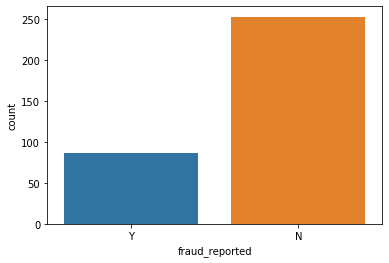

N    0.744118
Y    0.255882
Name: fraud_reported, dtype: float64


(N    253
 Y     87
 Name: fraud_reported, dtype: int64, None)

In [18]:
sns.countplot(df_fraud['fraud_reported'])
plt.show()
df_fraud['fraud_reported'].value_counts() , print(df_fraud['fraud_reported'].value_counts(normalize=True))


We can see that around 25% are reported fraud while 75% are not

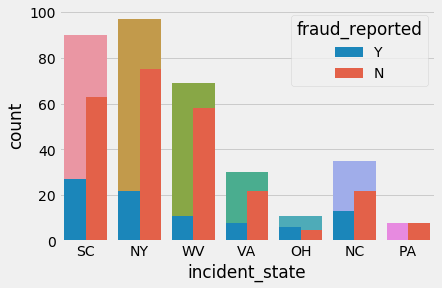

In [33]:
sns.countplot(df_fraud['incident_state'])
sns.countplot(df_fraud['incident_state'],hue=df_fraud['fraud_reported'])
plt.show()

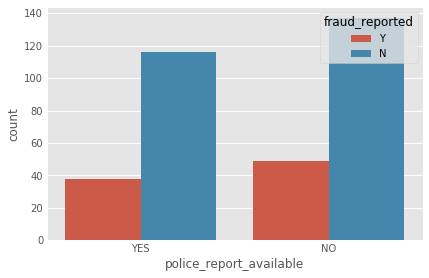

In [45]:
plt.style.use('ggplot')
sns.countplot(x='police_report_available',hue='fraud_reported',data=df_fraud)

plt.show()

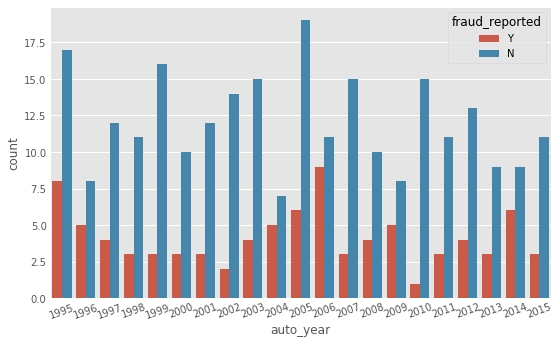

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x='auto_year',hue='fraud_reported',data=df_fraud)
plt.xticks(rotation=20)
plt.show()

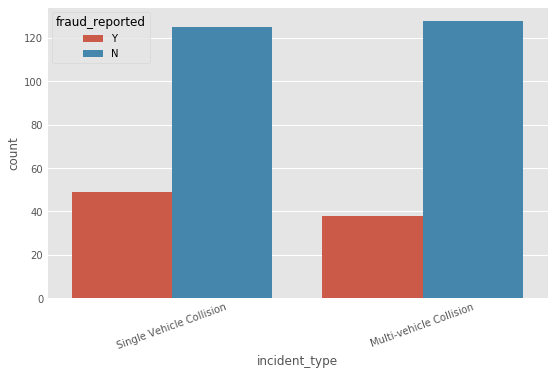

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='incident_type',hue='fraud_reported',data=df_fraud)
plt.xticks(rotation=20)
plt.show()

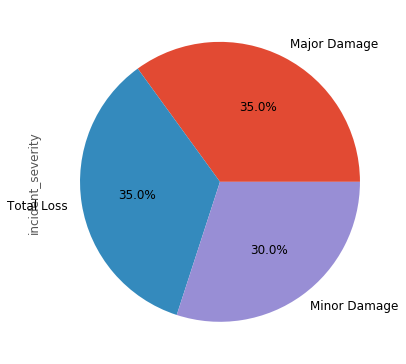

In [55]:
fig = plt.figure(figsize=(10,6))
ax = (df_fraud['incident_severity'].value_counts()*100.0 /len(df_fraud))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage'],
         fontsize=12)

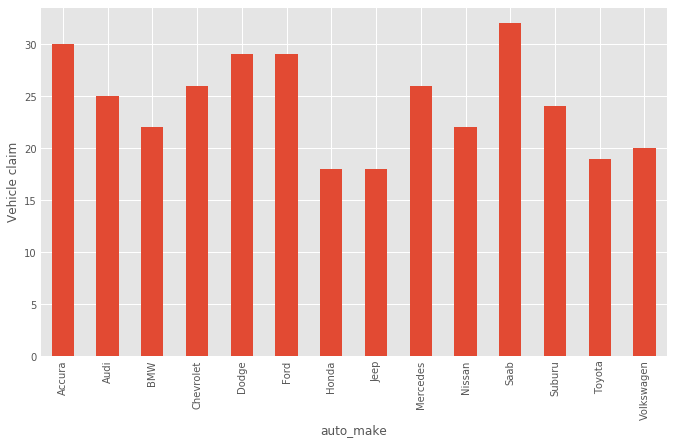

In [56]:
fig = plt.figure(figsize=(10,6))
ax= df_fraud.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
plt.show()

In [65]:
# Creating Incident period of the day from indicent of hour.
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df_fraud['incident_period_of_day'] = pd.cut(df_fraud.incident_hour_of_the_day, bins, labels=names).astype(object)

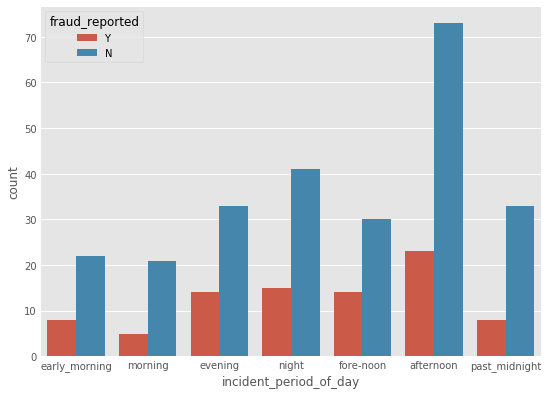

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(x='incident_period_of_day',hue='fraud_reported',data=df_fraud)
plt.show()

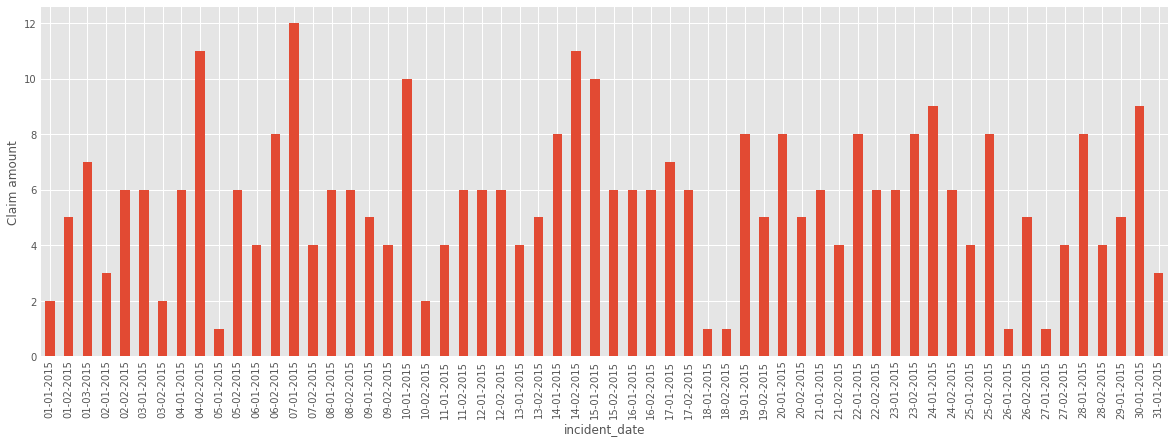

In [57]:
fig = plt.figure(figsize=(18,6))
ax = df_fraud.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount')
plt.show()

We can see that all the incidences are either January or Febuary of year 2015, we can find out the age of vehicle during claim

In [59]:
# Finding the age of the vehicle
df_fraud['vehicle_age'] = 2015 - df_fraud['auto_year'] 
df_fraud['vehicle_age'].head()

0     11
2      8
5     12
8      3
11     9
Name: vehicle_age, dtype: int64

In [60]:
def Kdeplot(x):
    fig = plt.figure(figsize=(10,4))
    ax=sns.kdeplot(df_fraud.loc[(df_fraud['fraud_reported'] == 'N'),x] , color='b',shade=True, label='Not Fraud') 
    ax=sns.kdeplot(df_fraud.loc[(df_fraud['fraud_reported'] == 'Y'),x] , color='r',shade=True, label='Fraud')
    plt.title(' Fraud rate with respect to {}'.format(x))

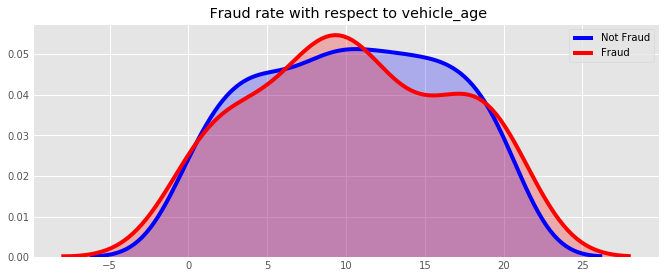

In [61]:
Kdeplot('vehicle_age')

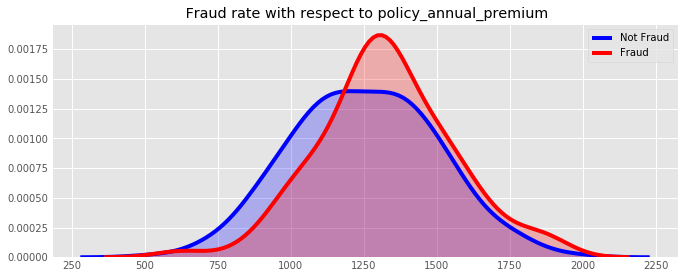

In [62]:
Kdeplot('policy_annual_premium')

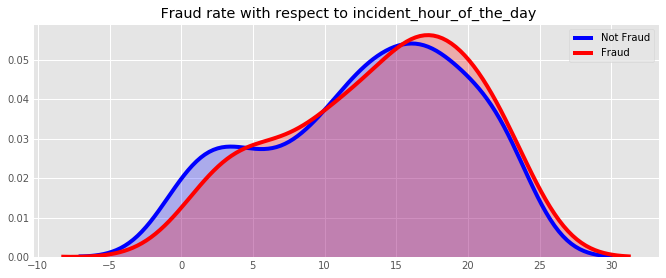

In [63]:
Kdeplot('incident_hour_of_the_day')

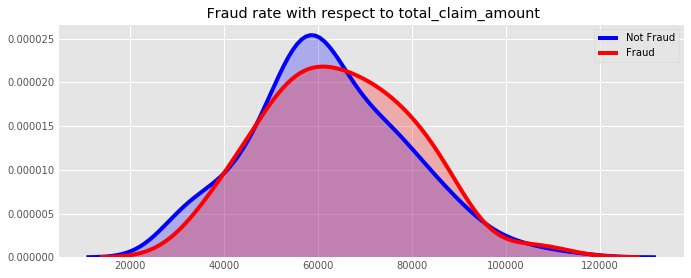

In [64]:
Kdeplot('total_claim_amount')

In [68]:
#dropping unimportant columns of dataset
df_fraud = df_fraud.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
     'auto_year', 
    'incident_hour_of_the_day'])

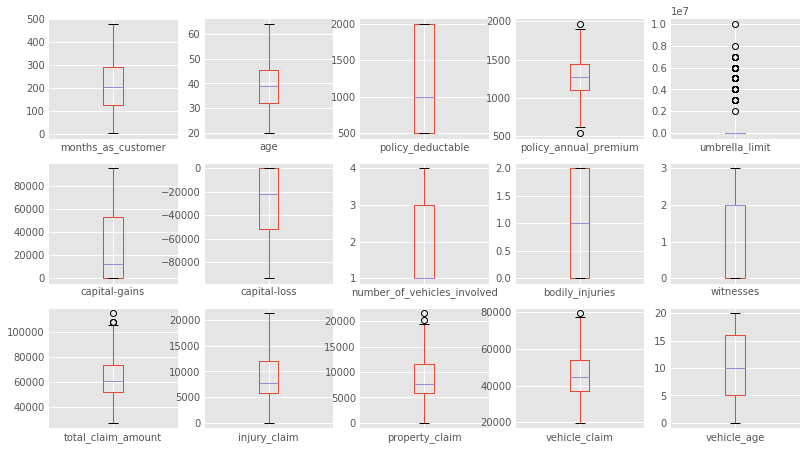

In [69]:
#Checking for outliers
df_fraud.plot(kind='box',subplots=True,layout=(5,5),figsize=(12,12))
plt.show()

We can see that nearly no outliers are there in our dataset

In [70]:
#Separating the input and ouput variable
df_x=df_fraud.drop(columns=['fraud_reported'])
y=df_fraud['fraud_reported']

In [71]:
#Encoding data using one hot endcoding technique
df_x=pd.get_dummies(df_x,drop_first=True)

In [73]:
df_x.shape

(340, 142)

We can see that column number are increased due to one hot encoding

In [72]:
# Encoding resulant variable using Laber Encoder
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [74]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x)

In [75]:
#Importing various neccessary parameters/fetures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [76]:
#Checking for best random state which give best accuracy/f1 score for various training techniques used to get best prediction
# Defining a class to check for best random state and f1 score.
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(tec,x,y):
    maxf1=0
    rand=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        tec.fit(train_x,train_y)
        y_pred=tec.predict(test_x)
        temp=f1_score(test_y,y_pred)
        if temp>maxf1:
            maxf1=temp
            rand=r_state
    print("Maximum f1_score is: ",maxf1, "at random state : ",rand)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes

In [78]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,stratify=y,random_state=42)

In [79]:
LR=LogisticRegression()
maxf1_score(LR,x,y)

Maximum f1_score is:  0.7692307692307693 at random state :  91


In [80]:
DT=DecisionTreeClassifier()
maxf1_score(DT,x,y)

Maximum f1_score is:  0.8125 at random state :  83


In [81]:
KN=KNeighborsClassifier()
maxf1_score(KN,x,y)

Maximum f1_score is:  0.3846153846153846 at random state :  43


In [82]:
SV=SVC()
maxf1_score(SV,x,y)

Maximum f1_score is:  0.21052631578947367 at random state :  43


In [83]:
RF=RandomForestClassifier()
maxf1_score(RF,x,y)

Maximum f1_score is:  0.4166666666666667 at random state :  97


In [84]:
GN=GaussianNB()
maxf1_score(GN,x,y)

Maximum f1_score is:  0.4571428571428572 at random state :  43


In [85]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV))
models.append(('KNeighborsClassifier',KN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('RandomForestClassifier', RF))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy Score =  0.8088235294117647


Cross Value Score =  0.8293149987267634


roc_auc_score =  0.7745098039215687


Classification_report 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       0.60      0.71      0.65        17

    accuracy                           0.81        68
   macro avg       0.75      0.77      0.76        68
weighted avg       0.82      0.81      0.81        68



[[43  8]
 [ 5 12]]


AxesSubplot(0.08,0.803585;0.696x0.0764151

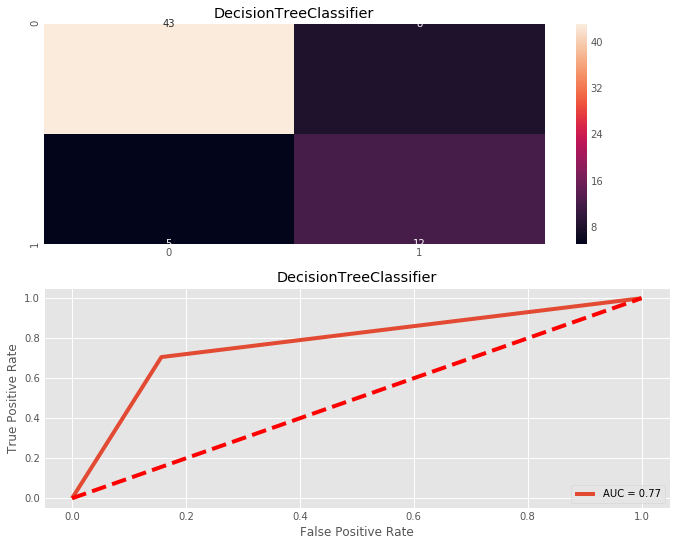

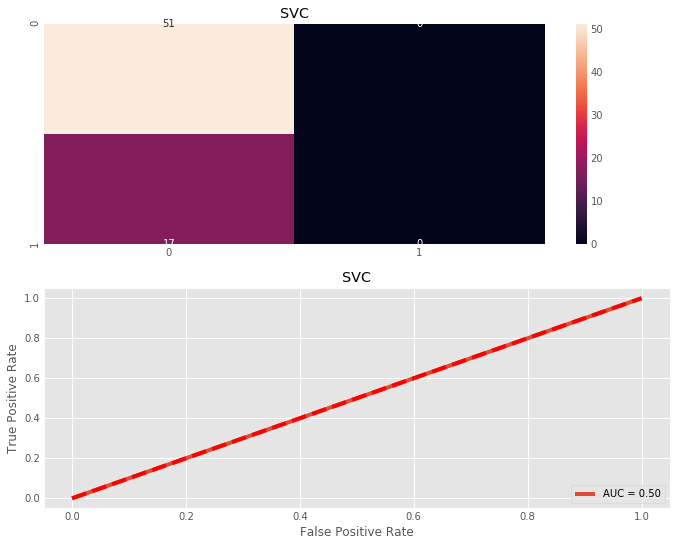

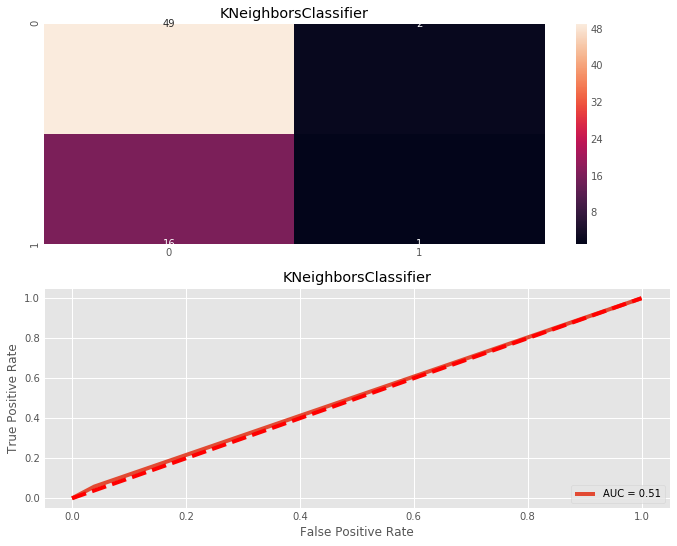

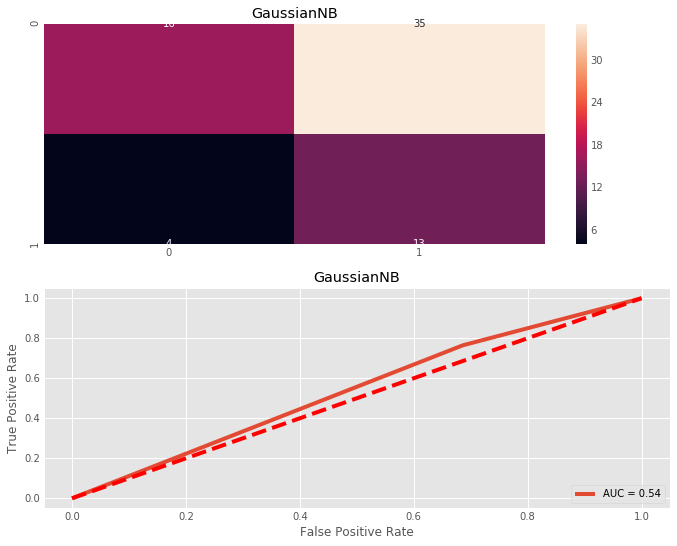

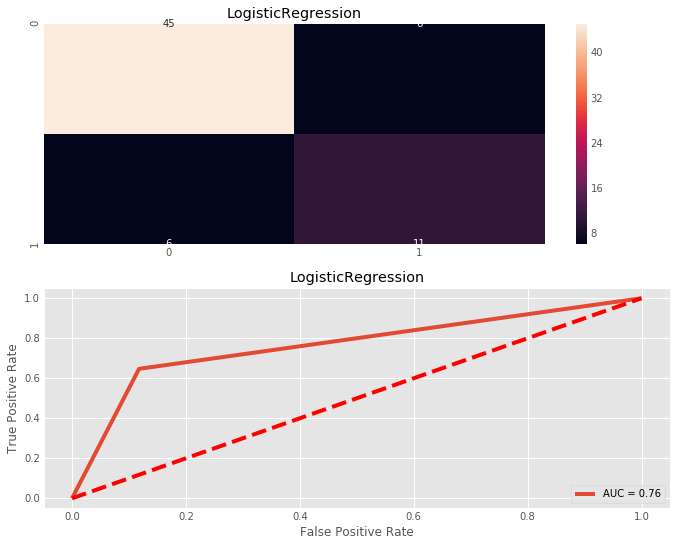

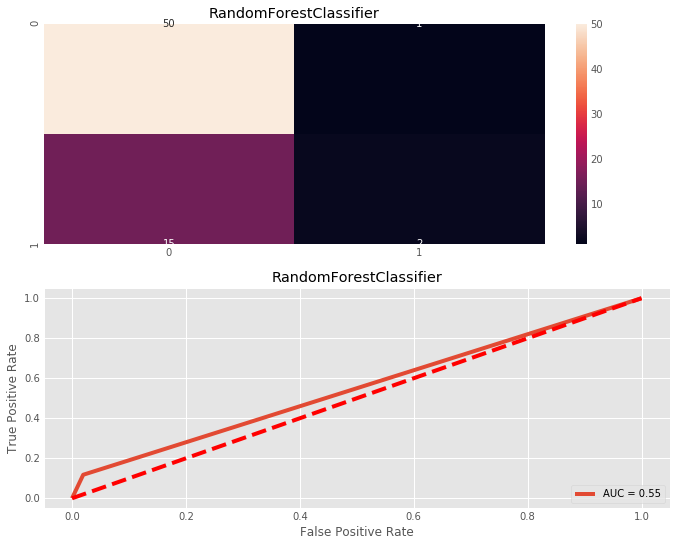

In [86]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [87]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,80.882353,82.931500,77.450980
1,SVC,75.000000,74.121721,50.000000
2,KNeighborsClassifier,73.529412,70.901706,50.980392
3,GaussianNB,42.647059,35.823529,53.921569
4,LogisticRegression,82.352941,76.112299,76.470588
5,RandomForestClassifier,76.470588,75.316017,54.901961


We can see that we are getting almost same scores from Decision tree and Logistic regression but for Decision tree we are getting the accuracy score of approx 81% , cross validation score of 83% and Roc auc score of  78%  , we can save our final model now

In [89]:
# Saving our final model using Joblib
from sklearn.externals import joblib 
  

joblib.dump(DT, 'DT_AutoInsurance-Fraud.pkl')

['DT_AutoInsurance-Fraud.pkl']

**This is the best and final model we have saved**